In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.exposure import rescale_intensity

## Lab 1
**Convolution**

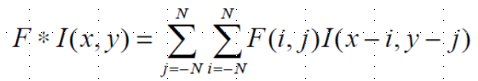

512 512


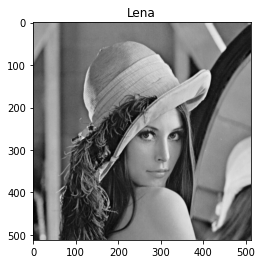

In [2]:
img = cv2.imread('./lena.png', 0)
img_h, img_w = img.shape

print(img_h, img_w)

plt.imshow(img, 'gray')
plt.title('Lena')
plt.show()

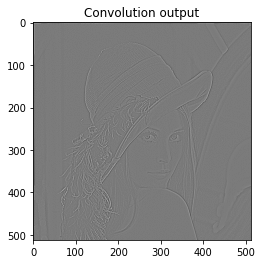

In [3]:
# Defining kernel
kernel = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
], dtype=np.float32)

kernel_size = len(kernel)

# Defining output image
output = np.zeros((img_h, img_w), dtype=np.float32)

# Adding border
n = (kernel_size-1) // 2
img = cv2.copyMakeBorder(img, n, n, n, n, cv2.BORDER_REPLICATE)

for x in range(img_h):
    for y in range(img_w):
        sum_ = 0
        for i in range(kernel_size):
            for j in range(kernel_size):
                sum_ += kernel[i, j] * img[x-n-i, y-n-j]
        output[x, y] = sum_
        
plt.imshow(output, 'gray')
plt.title('Convolution output')
plt.show()

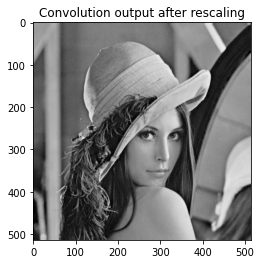

In [4]:
plt.imshow(rescale_intensity(img), 'gray')
plt.title('Convolution output after rescaling')
plt.show()

## Lab 2

**Bilateral filter**

**Gaussian filter**

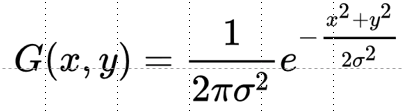

In [5]:
def get_gaussian_kernel(kernel_size=5, sigma=1):
    '''
    Space filter
    '''
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    mid = kernel_size // 2
    
    for x in range(-mid, mid+1):
        for y in range(-mid, mid+1):
            kernel[x+mid, y+mid] = (1 / (2 * np.pi * sigma**2)) * np.exp(- (x**2 + y**2) / (2 * sigma**2))
            
    return kernel

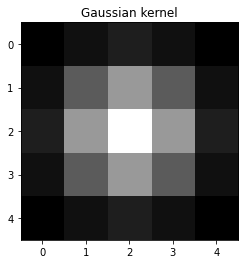

In [6]:
plt.imshow(get_gaussian_kernel(kernel_size=5), 'gray')
plt.title('Gaussian kernel')
plt.show()

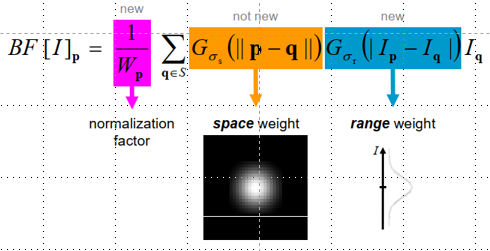

In [7]:
def get_range_filter(img, x, y, kernel_size=5, sigma=1):
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    mid = kernel_size // 2
    
    for i in range(-mid, mid+1):
        for j in range(-mid, mid+1):
            kernel[i+mid, j+mid] = (1 / (2 * np.pi * sigma**2)) * np.exp(- (img[x, y] - img[x+i, y+j])**2 / (2 * sigma**2))
            
    return kernel

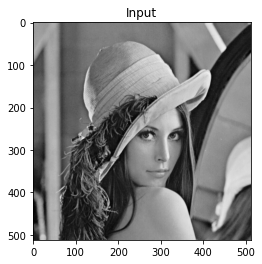

In [8]:
img = cv2.imread('./lena.png', 0)
img_h, img_w = img.shape

plt.imshow(img, 'gray')
plt.title('Input')
plt.show()

C:\Users\farha\AppData\Local\Temp\ipykernel_16040\2501088458.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  kernel[i+mid, j+mid] = (1 / (2 * np.pi * sigma**2)) * np.exp(- (img[x, y] - img[x+i, y+j])**2 / (2 * sigma**2))


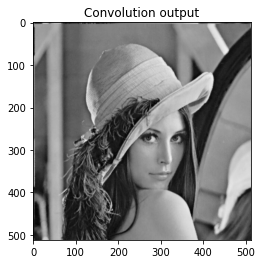

In [9]:
kernel_size = 5
kernel_gaussian = get_gaussian_kernel(kernel_size=kernel_size)

output = np.zeros((img_h, img_w), dtype=np.float32)

n = (kernel_size-1) // 2
img = cv2.copyMakeBorder(img, n, n, n, n, cv2.BORDER_REPLICATE)

for x in range(img_w):
    for y in range(img_h):
        # Bilateral kernel
        kernel = kernel_gaussian * get_range_filter(img, x, y, kernel_size=kernel_size)
        
        sum_ = 0
        for i in range(kernel_size):
            for j in range(kernel_size):
                sum_ += kernel[i, j] * img[x-n-i, y-n-j]  
        output[x, y] = sum_ / kernel.sum()
        
plt.imshow(output, 'gray')
plt.title('Bilateral output')
plt.show()

## Lab 3
**Histogram equalization**

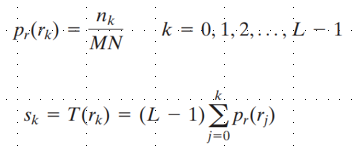

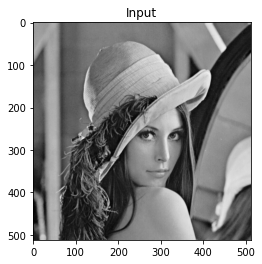

In [10]:
img = cv2.imread('./lena.png', 0)
img_h, img_w = img.shape

plt.imshow(img, 'gray')
plt.title('Input')
plt.show()

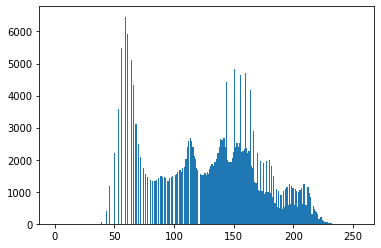

In [14]:
plt.hist(img.ravel(), bins=256, range=(0, 255))
plt.show()

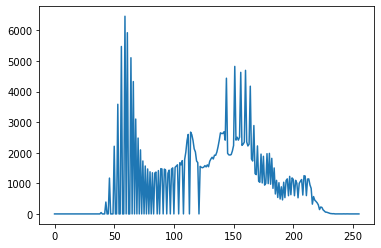

In [15]:
L = 256
M, N = img_h, img_w

n_k = np.zeros(L)

for i in range(M):
    for j in range(N):
        n_k[img[i, j]] += 1
        
plt.plot(n_k)
plt.show()

In [23]:
p_r = n_k / (M*N)

cdf = np.zeros(L)

for k in range(L):
    cdf[k] = np.sum(p_r[:k])
    
s_k = (L-1) * cdf

transformation = np.round(s_k)

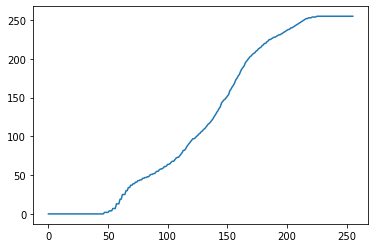

In [25]:
plt.plot(transformation)
plt.show()

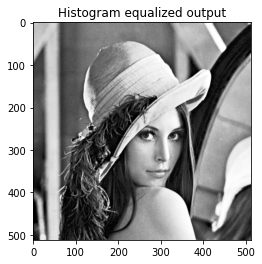

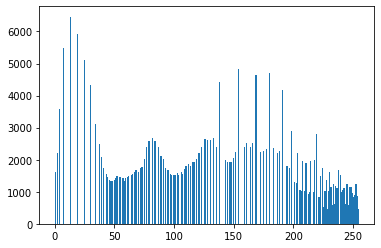

In [28]:
output = np.zeros((img_h, img_w), dtype=np.uint8)

for i in range(img_h):
    for j in range(img_w):
        output[i, j] = transformation[img[i, j]]
        
plt.imshow(output, 'gray')
plt.title('Histogram equalized output')
plt.show()

plt.hist(output.ravel(), bins=256, range=(0, 255))
plt.show()

## Lab 4

### Section A
**Homomorphic Filtering**

Modified form of the Gaussian highpass filter

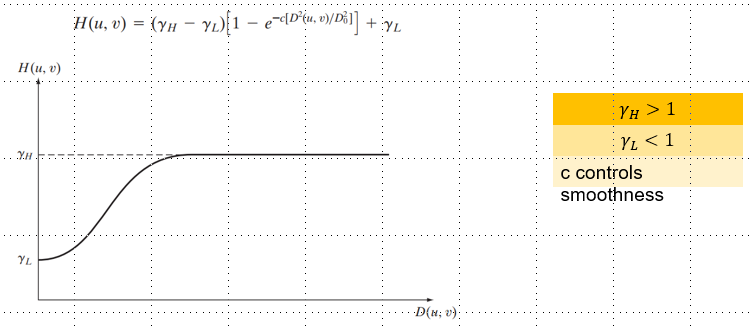

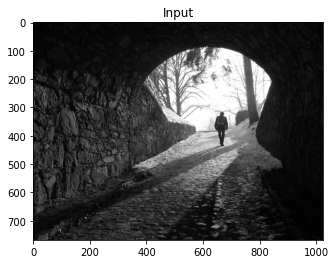

In [105]:
img = cv2.imread('./homo.jpg', 0)
img_h, img_w = img.shape

plt.imshow(img, 'gray')
plt.title('Input')
plt.show()

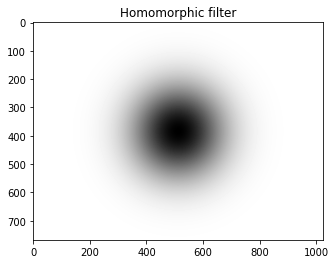

In [106]:
filter_homo = np.zeros((img_h, img_w), dtype=np.float32)

yh = 1.2
yl = 0.5
c = 0.1
d0 = 50

center_i, center_j = img_h // 2, img_w // 2

for i in range(img_h):
    for j in range(img_w):
        duv = (i-center_i)**2 + (j-center_j)**2
        filter_homo[i, j] = (yh-yl) * (1-np.exp(-c * (duv / d0**2))) + yl
        
plt.imshow(filter_homo, 'gray')
plt.title('Homomorphic filter')
plt.show()

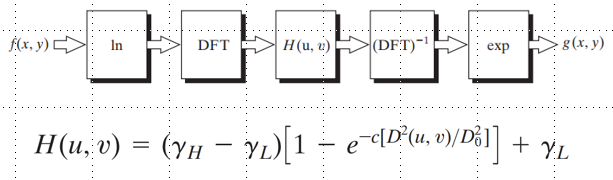

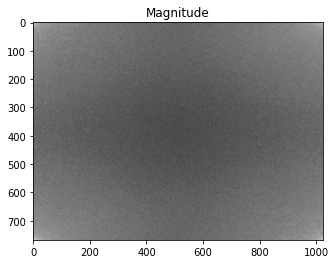

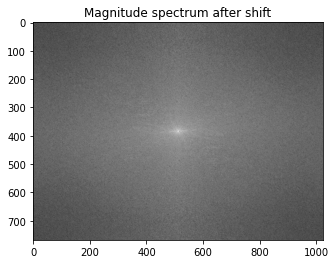

In [107]:
F = np.fft.fft2(img)
F_shift = np.fft.fftshift(F)

plt.imshow(np.log(np.abs(F)), 'gray')
plt.title('Magnitude')
plt.show()

plt.imshow(np.log(np.abs(F_shift)), 'gray')
plt.title('Magnitude spectrum after shift')
plt.show()

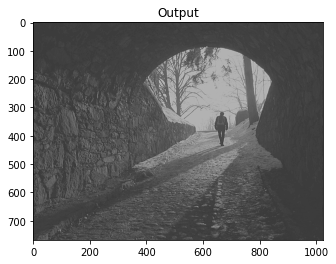

In [114]:
# Convolve
G_shift = F_shift * filter_homo

G = np.fft.ifftshift(G_shift)
output = np.fft.ifft2(G).real

plt.imshow(output, 'gray')
plt.title('Output')
plt.show()

### Section B
**Butterworth notch reject of order n**

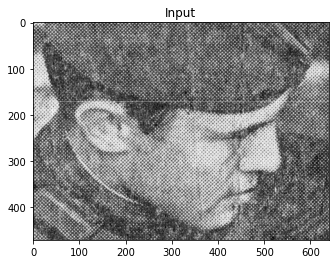

In [2]:
img = cv2.imread('./period_input.jpg', 0)
img_h, img_w = img.shape

plt.imshow(img, 'gray')
plt.title('Input')
plt.show()

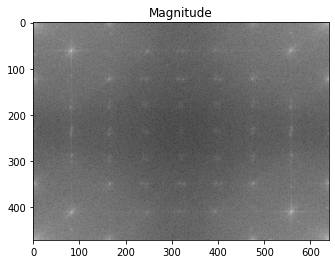

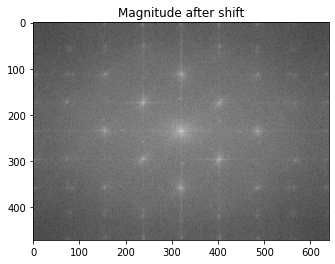

In [3]:
F = np.fft.fft2(img)
F_shift = np.fft.fftshift(F)

magnitude = np.log(np.abs(F))

plt.imshow(magnitude, 'gray')
plt.title('Magnitude')
plt.show()

magnitude_shift = np.log(np.abs(F_shift))

plt.imshow(magnitude_shift, 'gray')
plt.title('Magnitude after shift')
plt.show()

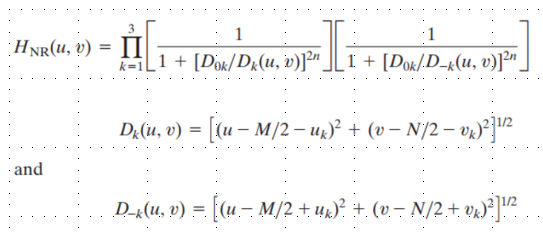

C:\Users\farha\AppData\Local\Temp\ipykernel_16028\1072936279.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  prod *= (1 / (1 + (d0 / duv)**(2*n))) * (1 / (1 + (d0 / dmuv)**(2*n)))


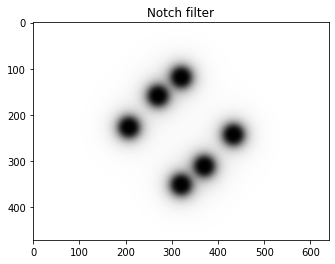

In [31]:
filter_butter = np.zeros((img_h, img_w), dtype=np.float32)

n = 2
d0 = 25

v = [320, 207, 270]
u = [119, 227, 159]


center_i, center_j = img_h//2, img_w//2

for i in range(img_h):
    for j in range(img_w):
        prod = 1
        for k in range(len(v)):
            duv = np.sqrt((i - center_i - (u[k]-center_i))**2 + (j - center_j - (v[k]-center_j))**2)
            dmuv = np.sqrt((i - center_i + (u[k]-center_i))**2 + (j - center_j + (v[k]-center_j))**2)
            prod *= (1 / (1 + (d0 / duv)**(2*n))) * (1 / (1 + (d0 / dmuv)**(2*n)))
        filter_butter[i, j] = prod
        
plt.imshow(filter_butter, 'gray')
plt.title('Notch filter')
plt.show()

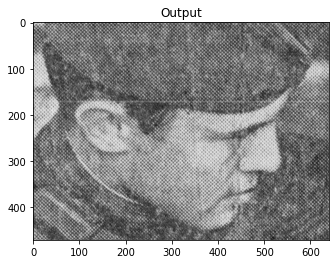

In [32]:
G_shift = F_shift * filter_butter

G = np.fft.ifftshift(G_shift)
output = np.fft.ifft2(G).real

plt.imshow(output, 'gray')
plt.title('Output')
plt.show()

## Lab 5
**Morphological Image Processing**

### Section A
**Skeletons**

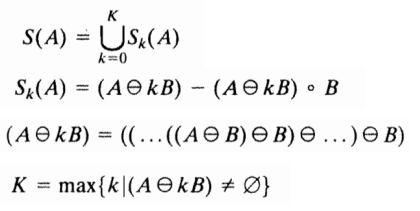

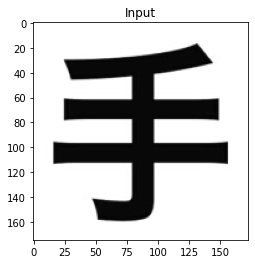

In [94]:
img = cv2.imread('./sample1.bmp', 0)
img_h, img_w = img.shape

plt.imshow(img, 'gray')
plt.title('Input')
plt.show()

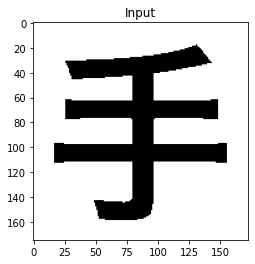

In [95]:
# Thresholding
img = (img > 170).astype(np.uint8)

plt.imshow(img, 'gray')
plt.title('Input')
plt.show()

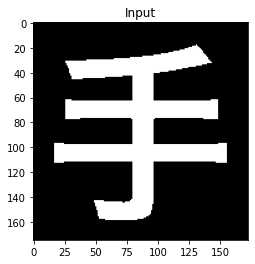

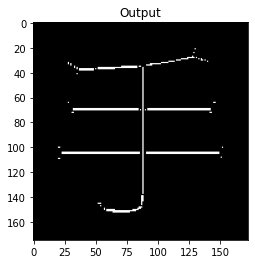

In [104]:
A = 1 - img

plt.imshow(A, 'gray')
plt.title('Input')
plt.show()

kernel = np.ones((3, 3), dtype=np.uint8)
skeleton = np.zeros((img_h, img_w), dtype=np.uint8)

k = 1
while True:
    er = cv2.erode(A, kernel, iterations=k)
    
    if np.sum(er) == 0:
        break
    
    op = cv2.morphologyEx(er, cv2.MORPH_OPEN, kernel)
    skeleton = skeleton | (er - op)
    
    k += 1
    
plt.imshow(skeleton, 'gray')
plt.title('Output')
plt.show()

### Section B
**Hole filling**

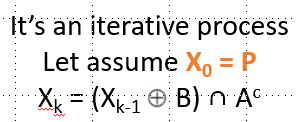

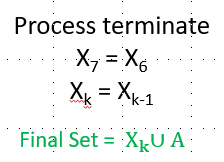

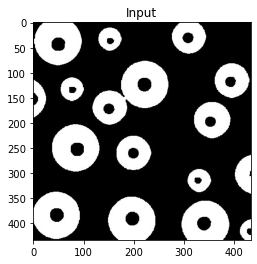

In [34]:
img = cv2.imread('./th_img2.jpg', 0)
img_h, img_w = img.shape

plt.imshow(img, 'gray')
plt.title('Input')
plt.show()

In [60]:
A = np.round(img / 255.0).astype(np.uint8)

x0 = np.zeros((img_h, img_w), dtype=np.uint8)
x0[125, 223] = 1
x0[388, 197] = 1
x0[405, 343] = 1

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

while True:
    x1 = cv2.dilate(x0, kernel, iterations=1) & (1-A)
    
    if np.sum(x1 != x0) == 0:
        break
        
    x0 = x1
    
output = A | x1

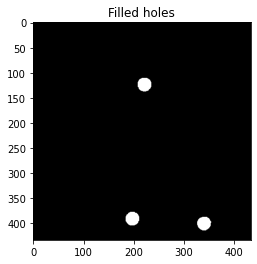

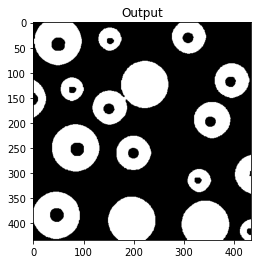

In [61]:
plt.imshow(x1, 'gray')
plt.title('Filled holes')
plt.show()

plt.imshow(output, 'gray')
plt.title('Output')
plt.show()